# Goal

To predict the survival rate of passangers on the titanic.

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [3]:
def plot_histograms(df, variables, rows, cols):
    figure = plt.figure(figsize=(16, 20))
    for i, name in enumerate(variables):
        ax = fig.add_subplot(rows, cols, i + 1)
        df[name].hist(bins=10, ax=ax)
        ax.set_title(str(round(float(df[name].skew()))))
    fig.tight_layout()
    plt.show


def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()


def plot_categories(df, cat, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()


def plot_correlation_map(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize': 12}
    )

In [4]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

combined_df = train_df.append(test_df)
titanic_df = combined_df[:891]

print('Datasets:', 'full:', combined_df.shape, 'titanic:', titanic_df.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


In [5]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
titanic_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


In [9]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
titanic_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
titanic_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
titanic_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


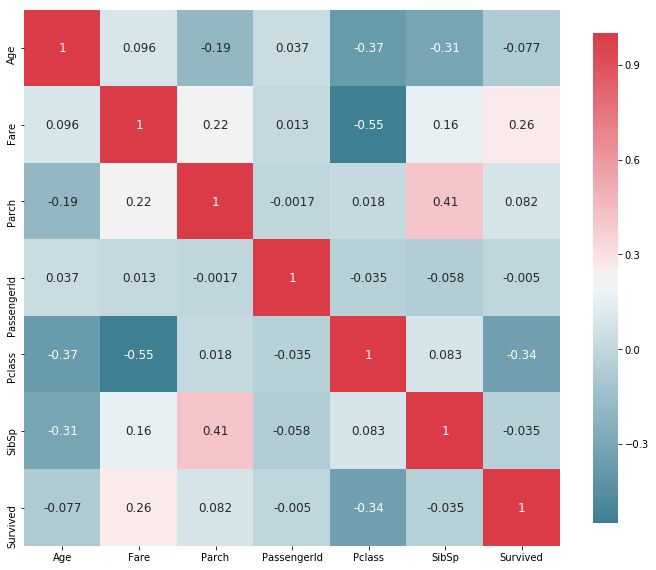

In [13]:
plot_correlation_map(titanic_df)

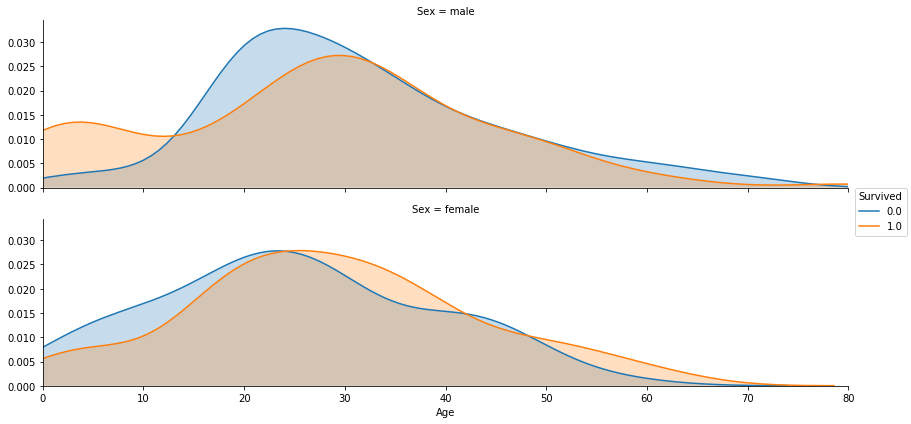

In [14]:
plot_distribution(titanic_df, var='Age', target='Survived', row='Sex')

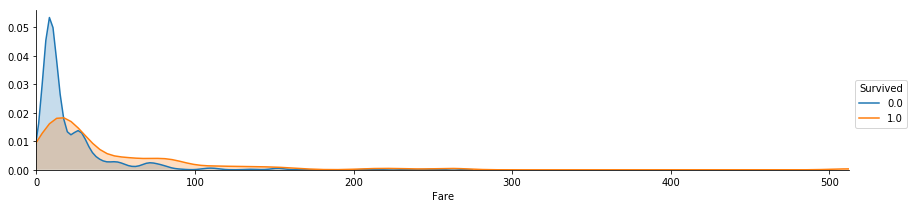

In [15]:
plot_distribution(titanic_df, var='Fare', target='Survived')

/home/alexsh/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


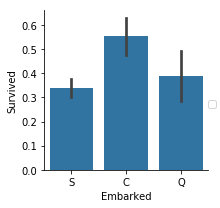

In [16]:
plot_categories(titanic_df, cat='Embarked', target='Survived')

/home/alexsh/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


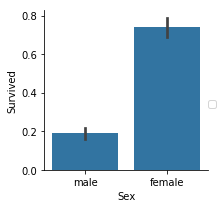

In [17]:
plot_categories(titanic_df, cat='Sex', target='Survived')

/home/alexsh/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


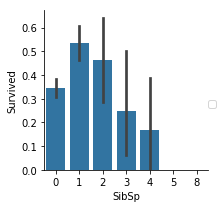

In [18]:
plot_categories(titanic_df, cat='SibSp', target='Survived')

/home/alexsh/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


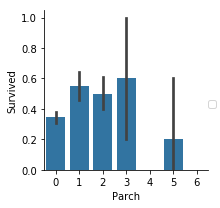

In [19]:
plot_categories(titanic_df, cat='Parch', target='Survived')

# 3. Data Preparation

Since the 'Sex' data is based off of the prevailing, and antiquated, theory of the the time, we have first convert it into a binary value: 0 and 1

In [21]:
sex = pd.Series(np.where(combined_df.Sex == 'male', 1, 0), name='Sex')

In [22]:
    emarked = pd.get_dummies(combined_df.Embarked, prefix='Embarked')
    emarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
pclass = pd.get_dummies(combined_df.Pclass, prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


The machine learning algorithms that we will be using require there to be no null values for variables. To fix our data set, we will take the average variable across all observations in the training set and assign them to the missing variables.

In [27]:
attributes = pd.DataFrame()

attributes['Age'] = combined_df.Age.fillna(combined_df.Age.mean())

attributes['Fare'] = combined_df.Fare.fillna(combined_df.Fare.mean())

attributes.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


# 3.3 Feature Engineering - Creating New Variables

### 3.3.1 Extract Titles From Passenger Names

In [34]:
title = pd.DataFrame()


title['Title'] = [name.split(',')[1].split('.')[0].strip()
                  for name in combined_df['Name']]


title_lookup = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir":       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess": "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr":        "Mr",
    "Mrs":       "Mrs",
    "Miss":      "Miss",
    "Master":    "Master",
    "Lady":      "Royalty"
}

title['Title'] = title.Title.map(title_lookup)

title = pd.get_dummies(title.Title)

title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


### 3.3.2 Extract Cabin Category Information From the Cabin Number

In [51]:
cabin = pd.DataFrame()

cabin['Cabin'] = combined_df.Cabin.fillna('U')

cabin['Cabin'] = [ c[0] for c in cabin['Cabin']]

cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin')

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
